In [ ]:
%pip install pandas

Exploring folder: fbb156a0dc35c2e9f126d5140ae6ea66
Processing image: engagement_animation.png
Processing image: endframe_3.png
Processing image: endframe_5.png
Processing image: thumbnail.jpg
Processing image: gametext_1.png
Processing image: gametext_2.png
Processing image: landing_1.jpg
Processing image: endframe_2.png
Processing image: _preview.png
Processing image: cta.png
Processing image: MPU-click-area.png
Processing image: landing_2.jpg
Processing image: advertised_item.png
Processing image: endframe_1.jpg
Processing image: endframe_4.png
Processing image: engagement_instruction.png
Displaying image: thumbnail.jpg from folder: fbb156a0dc35c2e9f126d5140ae6ea66


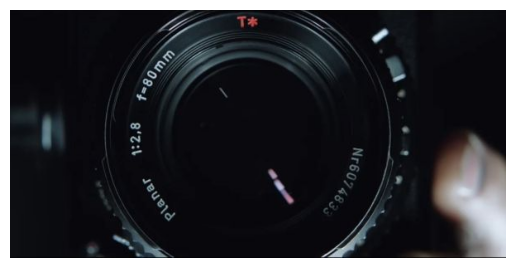

Displaying image: cta.png from folder: fbb156a0dc35c2e9f126d5140ae6ea66


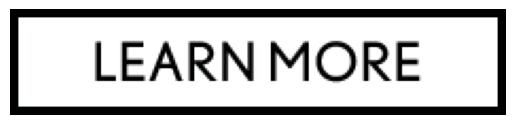

Displaying image: gametext_1.png from folder: fbb156a0dc35c2e9f126d5140ae6ea66


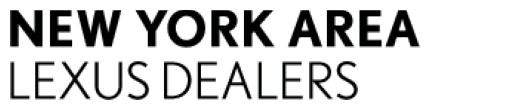

Displaying image: landing_2.jpg from folder: fbb156a0dc35c2e9f126d5140ae6ea66


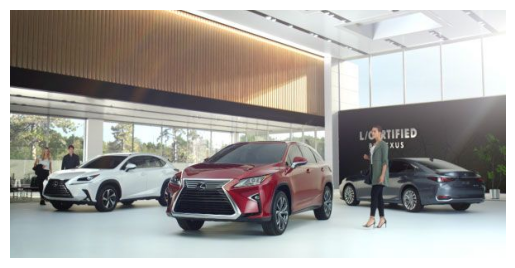

Displaying image: endframe_5.png from folder: fbb156a0dc35c2e9f126d5140ae6ea66


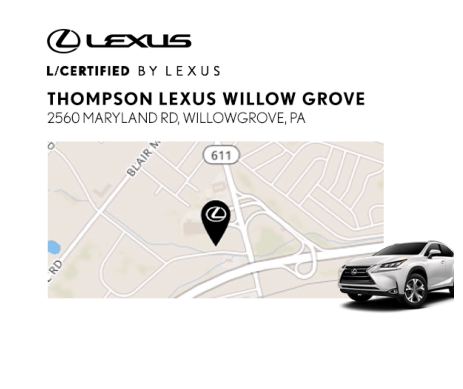

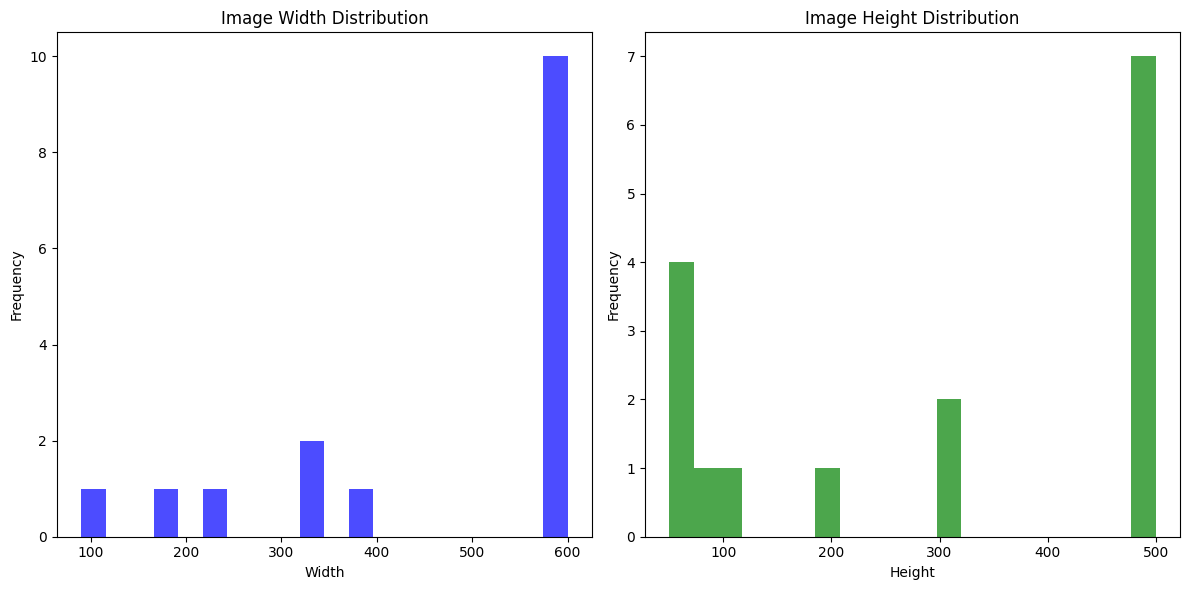

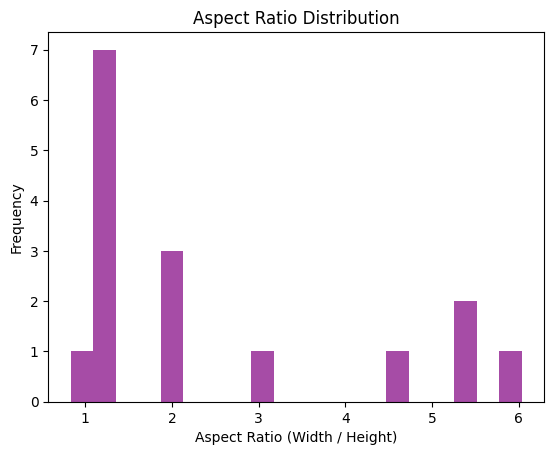

Summary Report:
            width      height  aspect_ratio
count   16.000000   16.000000     16.000000
mean   471.687500  295.937500      2.488070
std    182.904244  200.461956      1.841499
min     90.000000   50.000000      0.833333
25%    335.000000   84.750000      1.200000
50%    600.000000  300.000000      1.540217
75%    600.000000  500.000000      3.420000
max    600.000000  500.000000      6.031746
Number of images in each folder:
folder
fbb156a0dc35c2e9f126d5140ae6ea66    16
Name: count, dtype: int64


In [6]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Set the data directory path relative to the notebook's location
data_dir = './sample_data'

# Function to load JSON data
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Function to display an image
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

# Function to explore the dataset
def explore_dataset(data_dir):
    image_data = []
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            print(f"Exploring folder: {folder}")
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.jpg') or file.endswith('.png'):
                    print(f"Processing image: {file}")
                    width, height = get_image_dimensions(file_path)
                    image_data.append({
                        'folder': folder,
                        'filename': file,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width / height
                    })
                elif file.endswith('.json'):
                    print(f"Loading JSON file: {file}")
                    data = load_json(file_path)
                    print(json.dumps(data, indent=4))
    return pd.DataFrame(image_data)

# Run the exploration and get image data
image_df = explore_dataset(data_dir)

# Display some sample images
sample_images = image_df.sample(5)
for _, row in sample_images.iterrows():
    print(f"Displaying image: {row['filename']} from folder: {row['folder']}")
    display_image(os.path.join(data_dir, row['folder'], row['filename']))

# Plot histogram of image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_df['width'], bins=20, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_df['height'], bins=20, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histogram of aspect ratios
plt.figure()
plt.hist(image_df['aspect_ratio'], bins=20, color='purple', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.show()

# Summary report
print("Summary Report:")
print(image_df.describe())

# Count the number of images in each folder
folder_counts = image_df['folder'].value_counts()
print("Number of images in each folder:")
print(folder_counts)


In [25]:
%pip install pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


/home/melaku_alehegn/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/melaku_alehegn/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


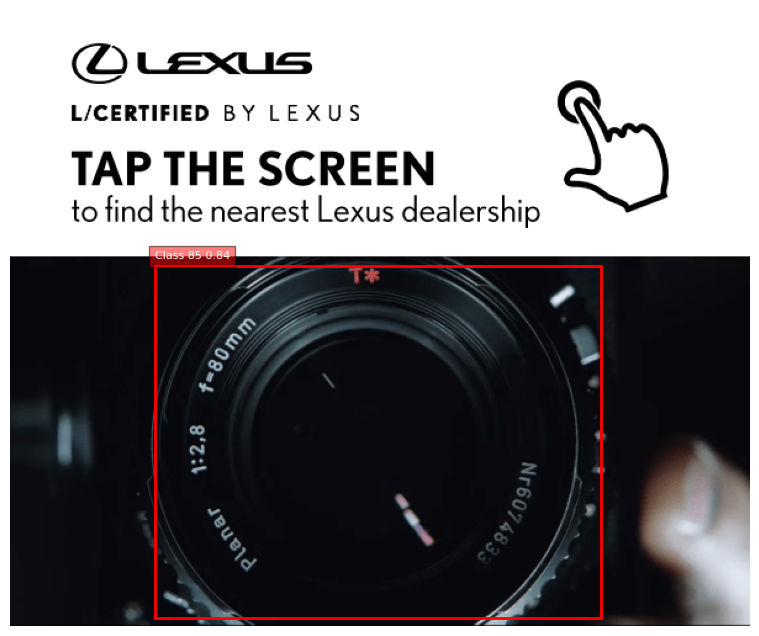

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

# Function to load and preprocess image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Load image and convert to RGB
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image, image_tensor

# Function to detect objects in an image and visualize them using Matplotlib
def detect_objects(image_path):
    original_image, image_tensor = load_image(image_path)
    
    with torch.no_grad():
        results = model(image_tensor)
    
    boxes = results[0]['boxes']  # Extract bounding boxes
    labels = results[0]['labels']  # Extract labels
    scores = results[0]['scores']  # Extract confidence scores
    
    # Visualize results using Matplotlib
    image_np = cv2.imread(image_path)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    plt.figure(figsize=(10, 8))
    plt.imshow(image_np)
    ax = plt.gca()
    
    for box, label, score in zip(boxes, labels, scores):
        xmin, ymin, xmax, ymax = box.tolist()
        class_label = f'Class {label.item()}'
        confidence = score.item()
        
        if confidence > 0.5:  # Confidence threshold
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_label} {confidence:.2f}', 
                    bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
    
    plt.axis('off')
    plt.show()

# Example usage
image_path = './sample_data/fbb156a0dc35c2e9f126d5140ae6ea66/_preview.png'
detect_objects(image_path)
